* Name: **Vu Truong Si**
* Github: **vutruong99**
* USC ID: **6031936649**

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from scipy.spatial.distance import hamming 
from sklearn.metrics import hamming_loss
from sklearn.metrics import silhouette_score
import statistics
from sklearn.metrics import accuracy_score

**1. Multi-class and Multi-Label Classification Using Support Vector Machines**

**a. Choose 70% of the data randomly as the training set.**

In [114]:
dataframe = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [115]:
dataframe

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [116]:
X = dataframe.iloc[:,:22]

In [117]:
y = dataframe[["Family", "Genus", "Species"]]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [119]:
y_train_family = y_train["Family"]
y_train_genus = y_train["Genus"]
y_train_species = y_train["Species"]

**b. Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach.**

**i. Research exact match and hamming score/ loss methods for evaluating multi-label classication and use them in evaluating the classifiers in this problem.**

- Hamming score ~ exact match = The number of correct labels / the total number of labels
- Hamming loss = The number of wrong labels / the total number of labels
- Hamming score = 1 - Hamming loss

For this exercise, I will use the accuracy_score function to calculate the exact match score and hamming_loss function to calculate Hamming loss then compare all 3 metrics together.

**ii. Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try
to solve the problem with both standardized 2 and raw attributes and report
the results.**

In [120]:
gamma_large_range = [0.1, 1.5, 3, 4.5, 6, 7.5, 9]
C_large_range = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]

In [121]:
svc = SVC(kernel = "rbf")
ovr = OneVsRestClassifier(svc)
parameters = {"estimator__gamma": gamma_large_range, 
             "estimator__C" : C_large_range}

In [122]:
# SVM to test the validation scores of the larger gamma and C ranges. (This is NOT SVM for each label)

family_grid = GridSearchCV(ovr, parameters, cv = 10, verbose = 1)
family_grid.fit(X_train, y_train_family)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'estimator__gamma': [0.1, 1.5, 3, 4.5, 6, 7.5, 9]},
             verbose=1)

In [123]:
for index in np.where(family_grid.cv_results_['mean_test_score'] > 0.80)[0]:
    print(family_grid.cv_results_["params"][index])

{'estimator__C': 0.01, 'estimator__gamma': 1.5}
{'estimator__C': 0.01, 'estimator__gamma': 3}
{'estimator__C': 0.01, 'estimator__gamma': 4.5}
{'estimator__C': 0.01, 'estimator__gamma': 6}
{'estimator__C': 0.01, 'estimator__gamma': 7.5}
{'estimator__C': 0.01, 'estimator__gamma': 9}
{'estimator__C': 0.1, 'estimator__gamma': 0.1}
{'estimator__C': 0.1, 'estimator__gamma': 1.5}
{'estimator__C': 0.1, 'estimator__gamma': 3}
{'estimator__C': 0.1, 'estimator__gamma': 4.5}
{'estimator__C': 0.1, 'estimator__gamma': 6}
{'estimator__C': 0.1, 'estimator__gamma': 7.5}
{'estimator__C': 0.1, 'estimator__gamma': 9}
{'estimator__C': 1.0, 'estimator__gamma': 0.1}
{'estimator__C': 1.0, 'estimator__gamma': 1.5}
{'estimator__C': 1.0, 'estimator__gamma': 3}
{'estimator__C': 1.0, 'estimator__gamma': 4.5}
{'estimator__C': 1.0, 'estimator__gamma': 6}
{'estimator__C': 1.0, 'estimator__gamma': 7.5}
{'estimator__C': 1.0, 'estimator__gamma': 9}
{'estimator__C': 10, 'estimator__gamma': 0.1}
{'estimator__C': 10, 'esti

**Comment**

As we can see here, we can zoom in on the range of C (0.1 -> 1000), while the Gamma range can be more flexible between (1 and 9). So for the rest of the homework I will be using Cs from 0.1 to 1000 and Gammas from 1 to 3. 

In [124]:
gamma_small_range = [1.0, 1.5, 2.0, 2.5, 3.0]
C_small_range = [0.1, 1.0, 10, 100, 1000]

In [125]:
# SVM for Family.

svc = SVC(kernel = "rbf")
ovr = OneVsRestClassifier(svc)
parameters = {"estimator__gamma": gamma_small_range, 
             "estimator__C" : C_small_range}

In [126]:
family_grid = GridSearchCV(ovr, parameters, cv = 10, verbose = 1)
family_grid.fit(X_train, y_train_family)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.1, 1.0, 10, 100, 1000],
                         'estimator__gamma': [1.0, 1.5, 2.0, 2.5, 3.0]},
             verbose=1)

In [127]:
print("Best penalty and Gaussian width for label Family:", family_grid.best_params_)

Best penalty and Gaussian width for label Family: {'estimator__C': 10, 'estimator__gamma': 2.5}


In [128]:
# SVM for Genus.

genus_grid = GridSearchCV(ovr, parameters, cv = 10, verbose = 1)
genus_grid.fit(X_train, y_train_genus)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.1, 1.0, 10, 100, 1000],
                         'estimator__gamma': [1.0, 1.5, 2.0, 2.5, 3.0]},
             verbose=1)

In [129]:
print("Best penalty and Gaussian width for label Genus:", genus_grid.best_params_)

Best penalty and Gaussian width for label Genus: {'estimator__C': 10, 'estimator__gamma': 2.5}


In [130]:
# SVM for Species.

species_grid = GridSearchCV(ovr, parameters, cv = 10, verbose = 1)
species_grid.fit(X_train, y_train_species)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.1, 1.0, 10, 100, 1000],
                         'estimator__gamma': [1.0, 1.5, 2.0, 2.5, 3.0]},
             verbose=1)

In [131]:
print("Best penalty and Gaussian width for label Species:", species_grid.best_params_)

Best penalty and Gaussian width for label Species: {'estimator__C': 10, 'estimator__gamma': 2.5}


In [132]:
y_preds_family = family_grid.predict(X_test)
y_preds_genus = genus_grid.predict(X_test)
y_preds_species = species_grid.predict(X_test)

In [133]:
# Exact match evaluation.

acc_family = accuracy_score(y_test["Family"], y_preds_family)
acc_genus = accuracy_score(y_test["Genus"], y_preds_genus)
acc_species = accuracy_score(y_test["Species"], y_preds_species)

print("Exact match score:", (acc_family + acc_genus + acc_species)/3)

Exact match score: 0.9924347691832639


In [134]:
y_test_tuples = list(y_test.itertuples(index=False, name=None))
y_pred_tuples = list(zip(y_preds_family, y_preds_genus, y_preds_species))

In [135]:
# Hamming score and loss.

hamming_scores = 0
hamming_losses = 0

for i, item in enumerate(y_test_tuples):
    hamming_losses += hamming_loss(item, y_pred_tuples[i])
    hamming_scores += (1 - hamming_loss(item, y_pred_tuples[i]))

print("Hamming Score:", hamming_scores / len(y_test_tuples))
print("Hamming Loss:", hamming_losses / len(y_test_tuples))

Hamming Score: 0.9924347691832638
Hamming Loss: 0.007565230816736142


As we can see, the Hamming score and exact match score are similar and Hamming loss = 1 - Hamming score.

**iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.**

In [136]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [137]:
pipeline = Pipeline([("lsvc", LinearSVC(penalty = "l1", dual = False, max_iter = 100000))])
parameters = {"lsvc__C" : C_small_range}

In [138]:
family_grid = GridSearchCV(pipeline, parameters, cv = 10)
family_grid.fit(X_train_scaled, y_train_family)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1'))]),
             param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [139]:
print("Best penalty and Gaussian width for label Family:", family_grid.best_params_)

Best penalty and Gaussian width for label Family: {'lsvc__C': 1.0}


In [140]:
genus_grid = GridSearchCV(pipeline, parameters, cv = 10)
genus_grid.fit(X_train_scaled, y_train_genus)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1'))]),
             param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [141]:
print("Best penalty and Gaussian width for label Genus:", genus_grid.best_params_)

Best penalty and Gaussian width for label Genus: {'lsvc__C': 10}


In [142]:
species_grid = GridSearchCV(pipeline, parameters, cv = 10)
species_grid.fit(X_train_scaled, y_train_species)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1'))]),
             param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [143]:
print("Best penalty and Gaussian width for label Species:", species_grid.best_params_)

Best penalty and Gaussian width for label Species: {'lsvc__C': 10}


In [144]:
y_preds_family = family_grid.predict(X_test_scaled)
y_preds_genus = genus_grid.predict(X_test_scaled)
y_preds_species = species_grid.predict(X_test_scaled)

In [145]:
# Exact match evaluation.

acc_family = accuracy_score(y_test["Family"], y_preds_family)
acc_genus = accuracy_score(y_test["Genus"], y_preds_genus)
acc_species = accuracy_score(y_test["Species"], y_preds_species)

print("Exact match score:", (acc_family + acc_genus + acc_species)/3)

Exact match score: 0.9413308630538829


In [146]:
y_test_tuples = list(y_test.itertuples(index=False, name=None))
y_pred_tuples = list(zip(y_preds_family, y_preds_genus, y_preds_species))

In [147]:
# Hamming score and loss.

hamming_scores = 0
hamming_losses = 0

for i, item in enumerate(y_test_tuples):
    hamming_losses += hamming_loss(item, y_pred_tuples[i])
    hamming_scores += (1 - hamming_loss(item, y_pred_tuples[i]))

print("Hamming Score:", hamming_scores / len(y_test_tuples))
print("Hamming Loss:", hamming_losses / len(y_test_tuples))

Hamming Score: 0.9413308630538837
Hamming Loss: 0.058669136946117


The models with standardized features did not perform as well as the models without standardized features. 

**iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.**

In [148]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state = 42)], ['lsvc',  LinearSVC(penalty = "l1", dual = False, max_iter = 100000)]])
parameters = {"lsvc__C" : C_small_range}

In [149]:
family_grid = GridSearchCV(pipeline, parameters, cv = 10, n_jobs = -1)
family_grid.fit(X_train_scaled, y_train_family) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1')]]),
             n_jobs=-1, param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [150]:
print("Best penalty and Gaussian width for label Family:", family_grid.best_params_)

Best penalty and Gaussian width for label Family: {'lsvc__C': 10}


In [151]:
genus_grid = GridSearchCV(pipeline, parameters, cv = 10)
genus_grid.fit(X_train_scaled, y_train_genus) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1')]]),
             param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [152]:
print("Best penalty and Gaussian width for label Genus:", genus_grid.best_params_)

Best penalty and Gaussian width for label Genus: {'lsvc__C': 1000}


In [153]:
species_grid = GridSearchCV(pipeline, parameters, cv = 10)
species_grid.fit(X_train_scaled, y_train_species) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['lsvc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  penalty='l1')]]),
             param_grid={'lsvc__C': [0.1, 1.0, 10, 100, 1000]})

In [154]:
print("Best penalty and Gaussian width for label Species:", species_grid.best_params_)

Best penalty and Gaussian width for label Species: {'lsvc__C': 1.0}


In [155]:
y_preds_family = family_grid.predict(X_test_scaled)
y_preds_genus = genus_grid.predict(X_test_scaled)
y_preds_species = species_grid.predict(X_test_scaled)

In [156]:
# Exact match evaluation.

acc_family = accuracy_score(y_test["Family"], y_preds_family)
acc_genus = accuracy_score(y_test["Genus"], y_preds_genus)
acc_species = accuracy_score(y_test["Species"], y_preds_species)

print("Exact match score:", (acc_family + acc_genus + acc_species)/3)

Exact match score: 0.9269723637486491


In [157]:
y_test_tuples = list(y_test.itertuples(index=False, name=None))
y_pred_tuples = list(zip(y_preds_family, y_preds_genus, y_preds_species))

In [158]:
# Hamming score and loss.

hamming_scores = 0
hamming_losses = 0

for i, item in enumerate(y_test_tuples):
    hamming_losses += hamming_loss(item, y_pred_tuples[i])
    hamming_scores += (1 - hamming_loss(item, y_pred_tuples[i]))

print("Hamming Score:", hamming_scores / len(y_test_tuples))
print("Hamming Loss:", hamming_losses / len(y_test_tuples))

Hamming Score: 0.926972363748651
Hamming Loss: 0.07302763625135097


With SMOTE, we can also see that the models did not perform as wel as the models in b(ii).

**2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo**

In [159]:
hamming_distances_50 = []
hamming_losses_50 = []
hamming_scores_50 = []

for i in range(50):
    print("Iteration", i + 1, "results:")
    print("")
#  (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k 2 f1; 2; : : : ; 50g automatically based on one of the methods
# provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know. 
    max_k = 0 
    max_silhouette_score = 0
    for k in range (2,51):
        kmeans = KMeans(k)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        score = silhouette_score(X, kmeans.labels_, metric='euclidean')
        if score >= max_silhouette_score:
            max_silhouette_score = score
            max_k = k
            
    print("Best K", max_k)
    
    kmeans = KMeans(max_k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    
#     (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
    
    family_cluster = dict()
    most_common_family = []
    for i in range(4):
        family_cluster[i] = []

    for index, cluster in enumerate(preds):
        family = y["Family"][index]
        family_cluster[cluster].append(family)

    for cluster in family_cluster.keys():
        counter = Counter(family_cluster[cluster])
        most_common_family.append(counter.most_common(1)[0][0])
        print("Most common families:", cluster, counter.most_common(1)[0][0])
#     -------------------------------------------------------------------------------
    genus_cluster = dict()
    most_common_genus = []
    for i in range(4):
        genus_cluster[i] = []

    for index, cluster in enumerate(preds):
        genus = y["Genus"][index]
        genus_cluster[cluster].append(genus)

    for cluster in genus_cluster.keys():
        counter = Counter(genus_cluster[cluster])
        most_common_genus.append(counter.most_common(1)[0][0])
        print("Most common genuses:", cluster, counter.most_common(1)[0][0])
#     -------------------------------------------------------------------------------
    species_cluster = dict()
    most_common_species = []
    for i in range(4):
        species_cluster[i] = []

    for index, cluster in enumerate(preds):
        species = y["Species"][index]
        species_cluster[cluster].append(species)

    for cluster in species_cluster.keys():
        counter = Counter(species_cluster[cluster])
        most_common_species.append(counter.most_common(1)[0][0])
        print("Most common species:", cluster, counter.most_common(1)[0][0])
#     -------------------------------------------------------------------------------
    cluster_label = dict()
    for i in range(4):
        cluster_label[i] = [most_common_family[i], most_common_genus[i], most_common_species[i]]
    print("Predicted labels:", cluster_label)
    
#   (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, 
# Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

    hamming_distances = 0
    hamming_losses = 0
    hamming_scores = 0
    
    for index, cluster in enumerate(preds):
        true_label = [y["Family"][index], y["Genus"][index], y["Species"][index]]
        pred_label = cluster_label[cluster]
        hamming_distances += (hamming(true_label, pred_label) * 3)
        hamming_losses += hamming_loss(true_label, pred_label)
        hamming_scores += (1 - hamming_loss(true_label, pred_label))
        
    hamming_distances_50.append(hamming_distances / len(preds))
    hamming_losses_50.append(hamming_scores / len(preds))
    hamming_scores_50.append(hamming_losses / len(preds))

    print("Average Hamming distance:", hamming_distances / len(preds))
    print("Average Hamming score:", hamming_scores / len(preds))
    print("Average Hamming loss:", hamming_losses / len(preds))

    print("")

Iteration 1 results:

Best K 4
Most common families: 0 Dendrobatidae
Most common families: 1 Hylidae
Most common families: 2 Leptodactylidae
Most common families: 3 Hylidae
Most common genuses: 0 Ameerega
Most common genuses: 1 Hypsiboas
Most common genuses: 2 Adenomera
Most common genuses: 3 Hypsiboas
Most common species: 0 Ameeregatrivittata
Most common species: 1 HypsiboasCinerascens
Most common species: 2 AdenomeraHylaedactylus
Most common species: 3 HypsiboasCordobae
Predicted labels: {0: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'], 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']}
Average Hamming distance: 0.6664350243224462
Average Hamming score: 0.7778549918925132
Average Hamming loss: 0.2221450081074831

Iteration 2 results:

Best K 4
Most common families: 0 Leptodactylidae
Most common families: 1 Hylidae
Most common families: 2 Hylidae
Most common famili

Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 11 results:

Best K 4
Most common families: 0 Hylidae
Most common families: 1 Hylidae
Most common families: 2 Leptodactylidae
Most common families: 3 Dendrobatidae
Most common genuses: 0 Hypsiboas
Most common genuses: 1 Hypsiboas
Most common genuses: 2 Adenomera
Most common genuses: 3 Ameerega
Most common species: 0 HypsiboasCinerascens
Most common species: 1 HypsiboasCordobae
Most common species: 2 AdenomeraHylaedactylus
Most common species: 3 Ameeregatrivittata
Predicted labels: {0: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'], 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 3: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']}
Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 12 results:

Best

Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 21 results:

Best K 4
Most common families: 0 Leptodactylidae
Most common families: 1 Hylidae
Most common families: 2 Hylidae
Most common families: 3 Dendrobatidae
Most common genuses: 0 Adenomera
Most common genuses: 1 Hypsiboas
Most common genuses: 2 Hypsiboas
Most common genuses: 3 Ameerega
Most common species: 0 AdenomeraHylaedactylus
Most common species: 1 HypsiboasCordobae
Most common species: 2 HypsiboasCinerascens
Most common species: 3 Ameeregatrivittata
Predicted labels: {0: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'], 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 3: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']}
Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 22 results:

Best

Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 31 results:

Best K 4
Most common families: 0 Hylidae
Most common families: 1 Hylidae
Most common families: 2 Leptodactylidae
Most common families: 3 Dendrobatidae
Most common genuses: 0 Hypsiboas
Most common genuses: 1 Hypsiboas
Most common genuses: 2 Adenomera
Most common genuses: 3 Ameerega
Most common species: 0 HypsiboasCinerascens
Most common species: 1 HypsiboasCordobae
Most common species: 2 AdenomeraHylaedactylus
Most common species: 3 Ameeregatrivittata
Predicted labels: {0: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'], 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 3: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']}
Average Hamming distance: 0.6668519805420431
Average Hamming score: 0.7777160064859808
Average Hamming loss: 0.2222839935140154

Iteration 32 results:

Be

Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 41 results:

Best K 4
Most common families: 0 Dendrobatidae
Most common families: 1 Leptodactylidae
Most common families: 2 Hylidae
Most common families: 3 Hylidae
Most common genuses: 0 Ameerega
Most common genuses: 1 Adenomera
Most common genuses: 2 Hypsiboas
Most common genuses: 3 Hypsiboas
Most common species: 0 Ameeregatrivittata
Most common species: 1 AdenomeraHylaedactylus
Most common species: 2 HypsiboasCinerascens
Most common species: 3 HypsiboasCordobae
Predicted labels: {0: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'], 1: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']}
Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477

Iteration 42 results:

Best

Average Hamming distance: 0.66726893676164
Average Hamming score: 0.7775770210794486
Average Hamming loss: 0.2224229789205477



In [160]:
print("stdev of Hamming Distance:", statistics.pstdev(hamming_distances_50))
print("stdev of Hamming Score:", statistics.pstdev(hamming_scores_50))
print("stdev of Hamming Loss:", statistics.pstdev(hamming_losses_50))

stdev of Hamming Distance: 0.01936080501735111
stdev of Hamming Score: 0.006453601672450148
stdev of Hamming Loss: 0.006453601672451815


In [161]:
print("Average of Hamming Distance:", statistics.mean(hamming_distances_50))
print("Average of Hamming Score:", statistics.mean(hamming_scores_50))
print("Average of Hamming Loss:", statistics.mean(hamming_losses_50))

Average of Hamming Distance: 0.6740013898540653
Average of Hamming Score: 0.2246671299513561
Average of Hamming Loss: 0.7753328700486397


**3. 12.6.2**

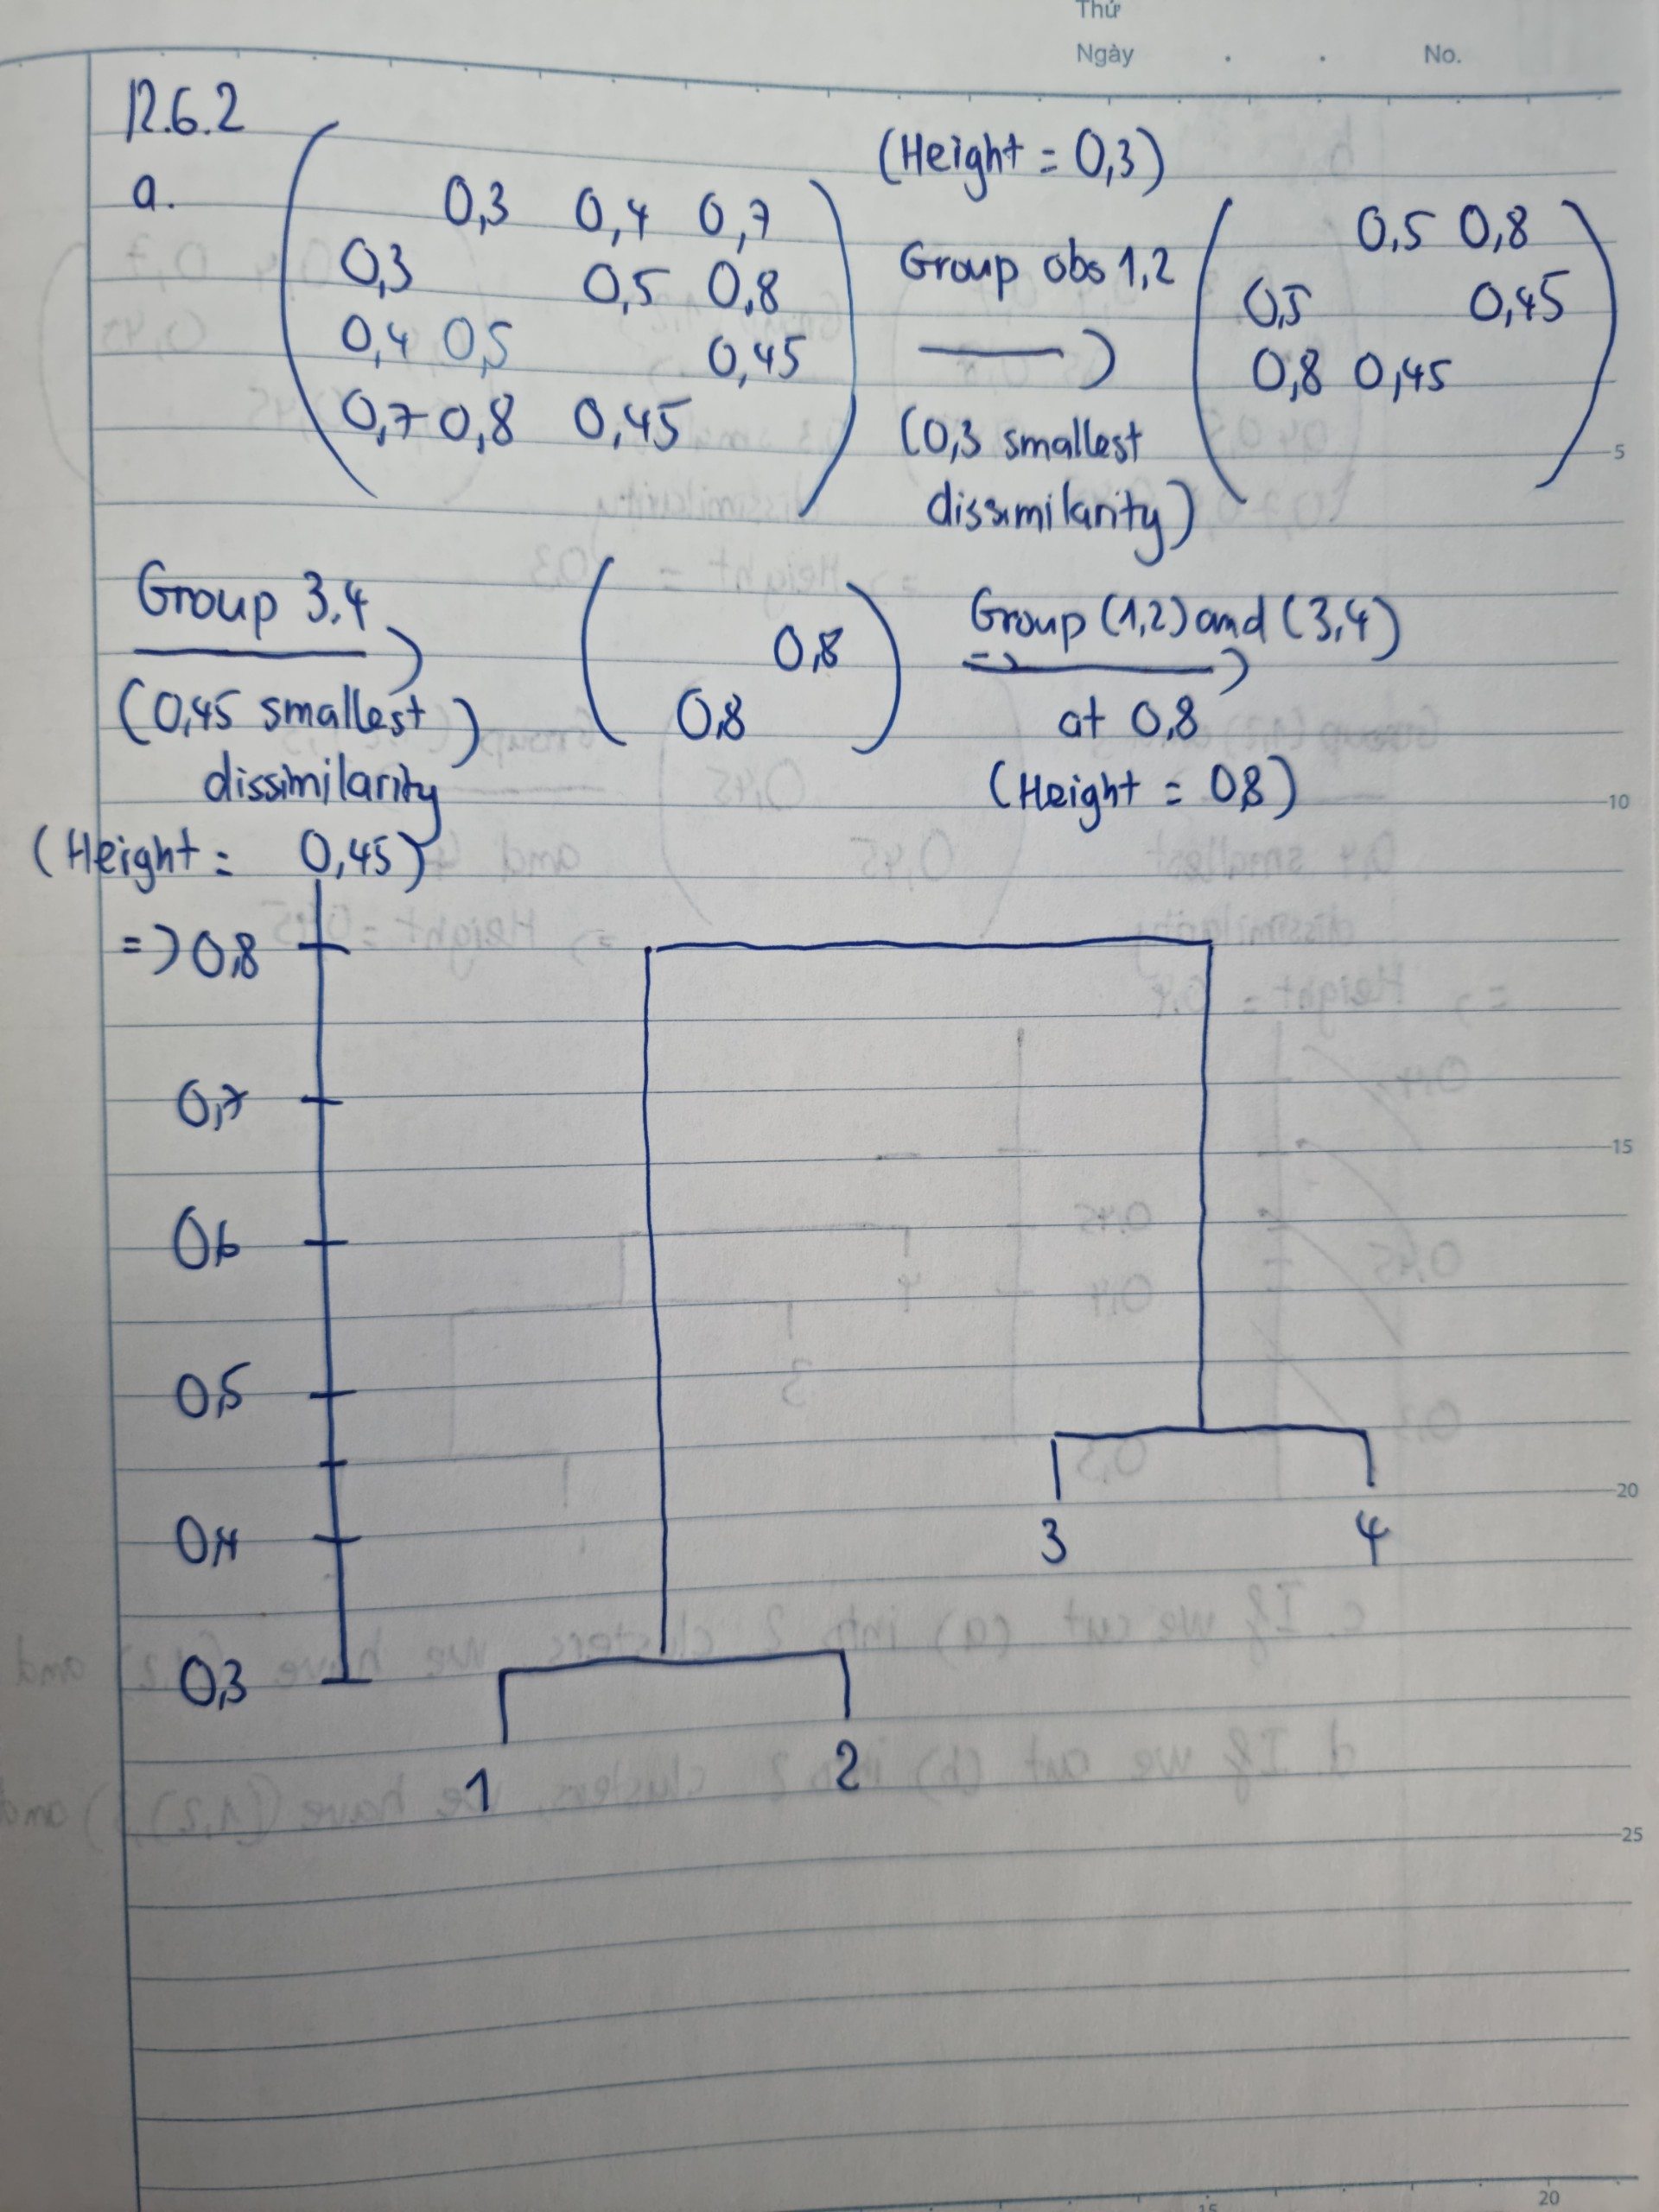

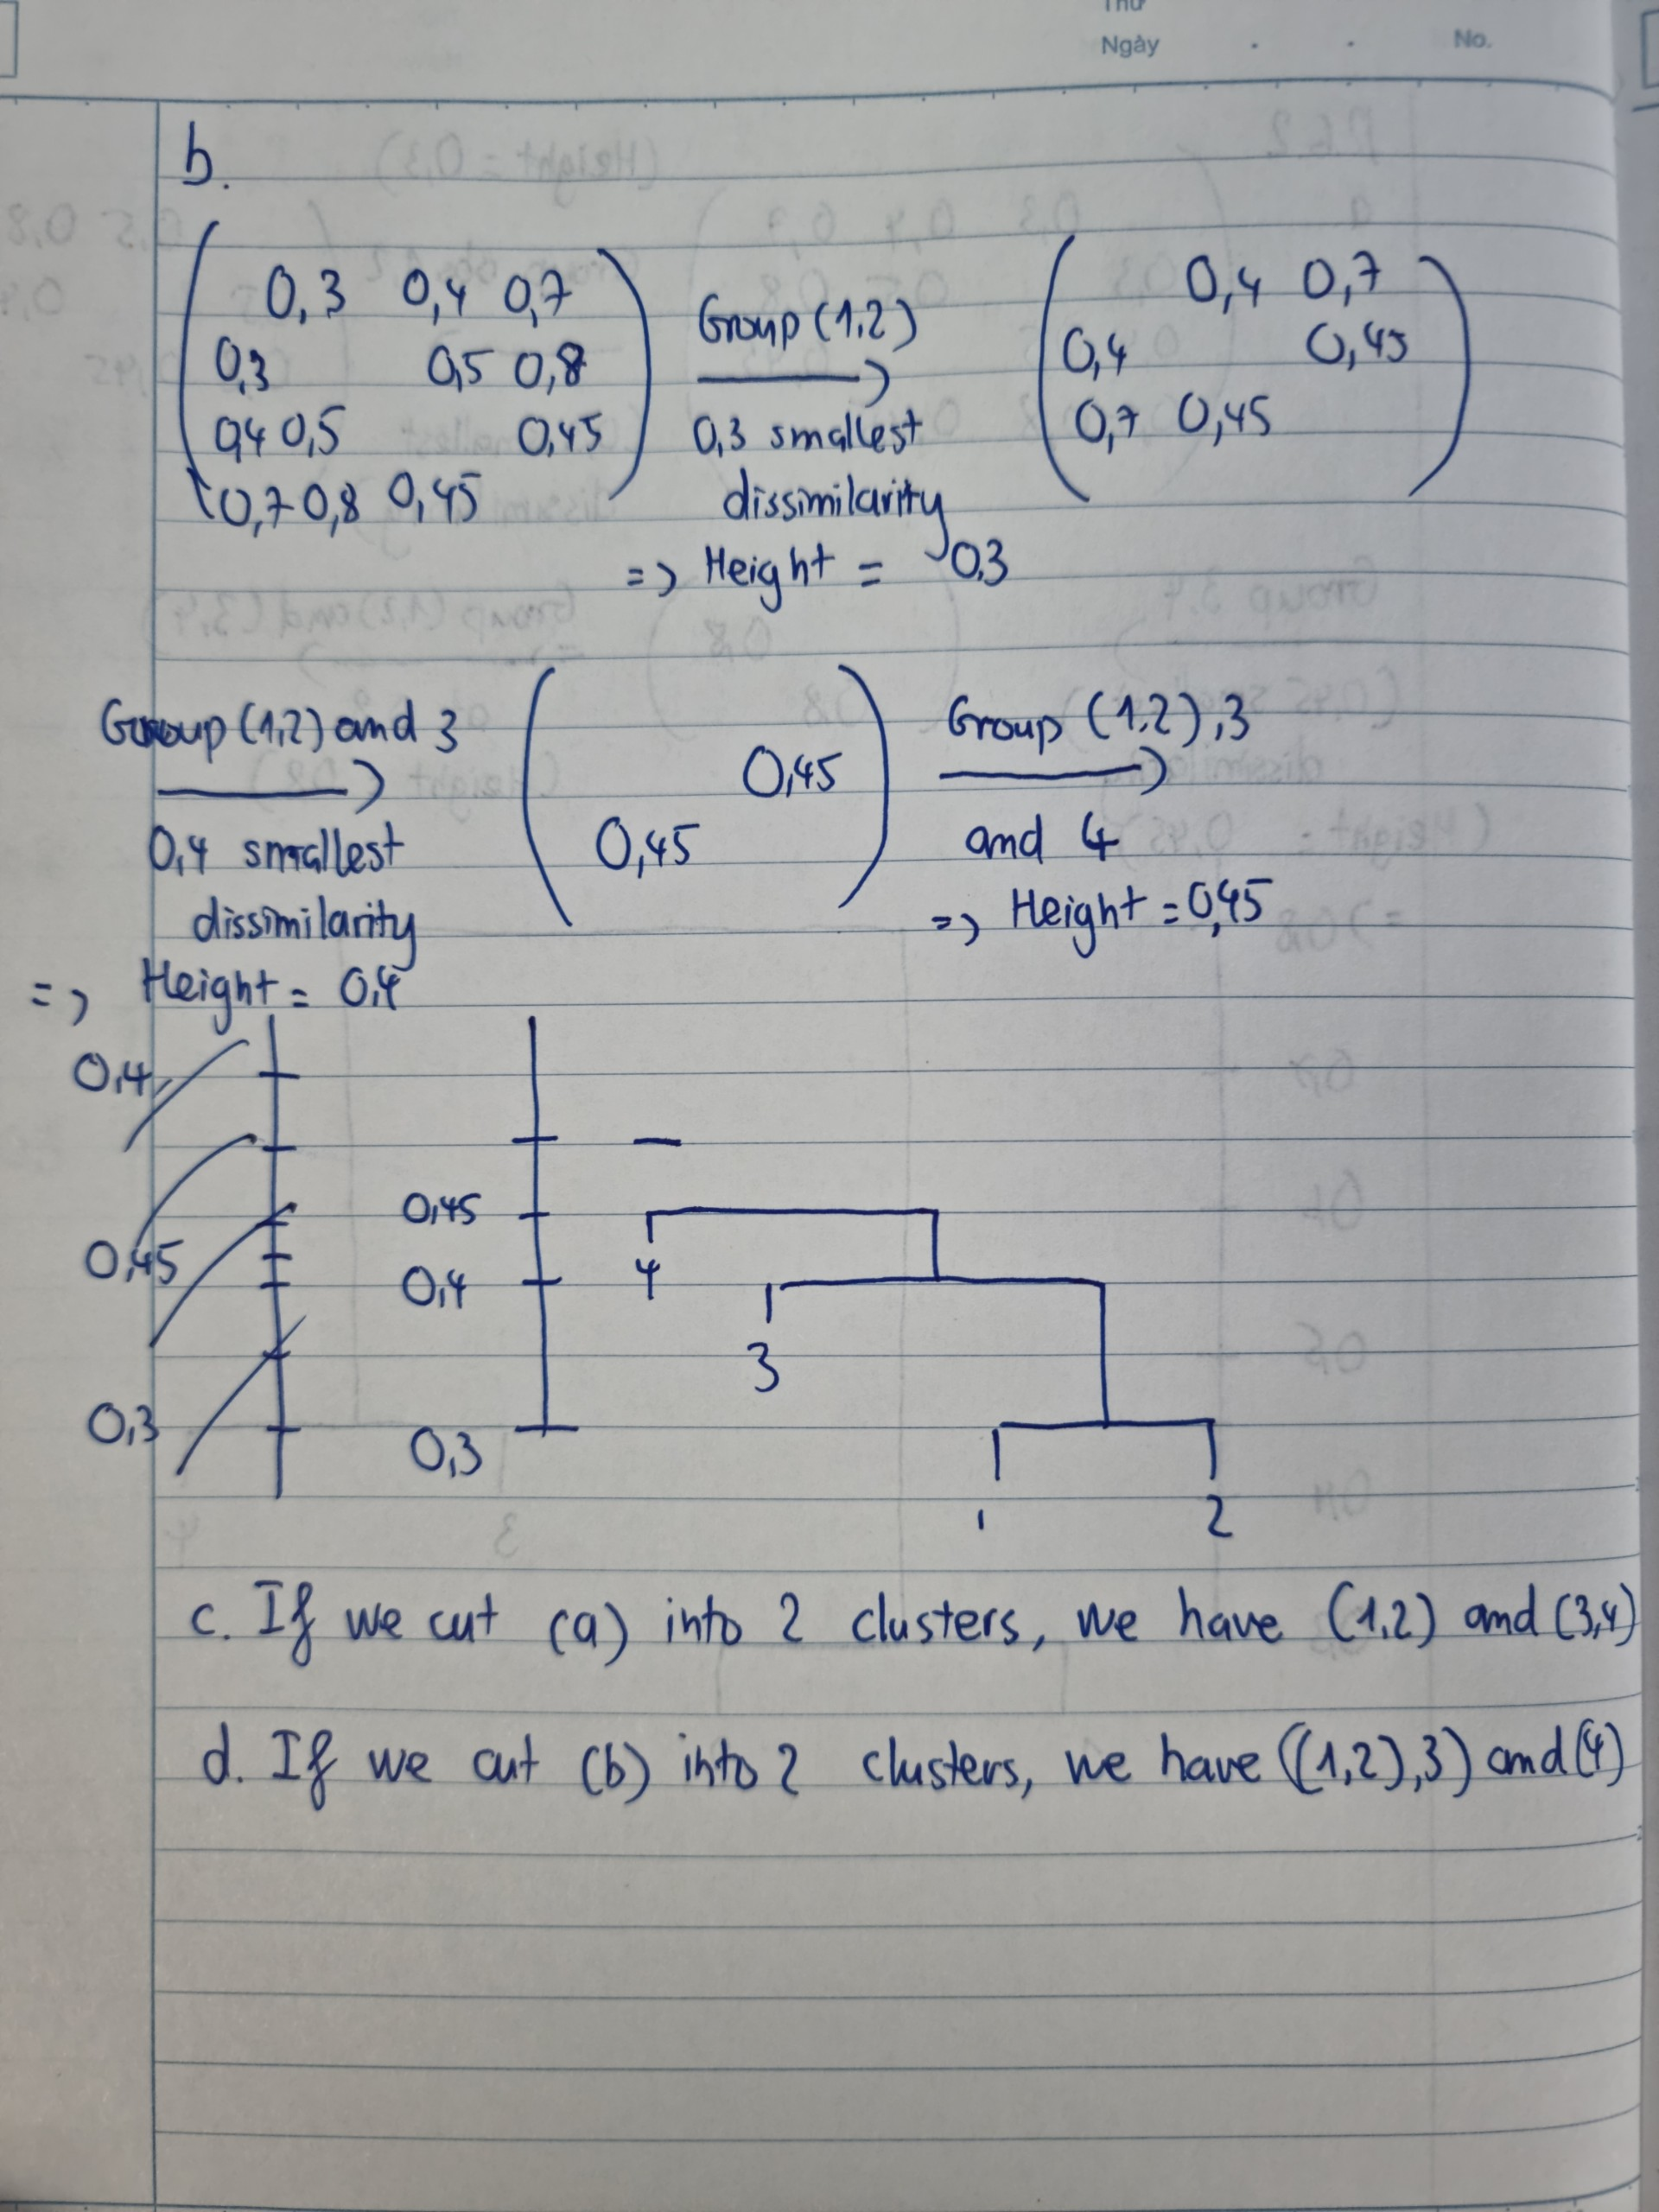

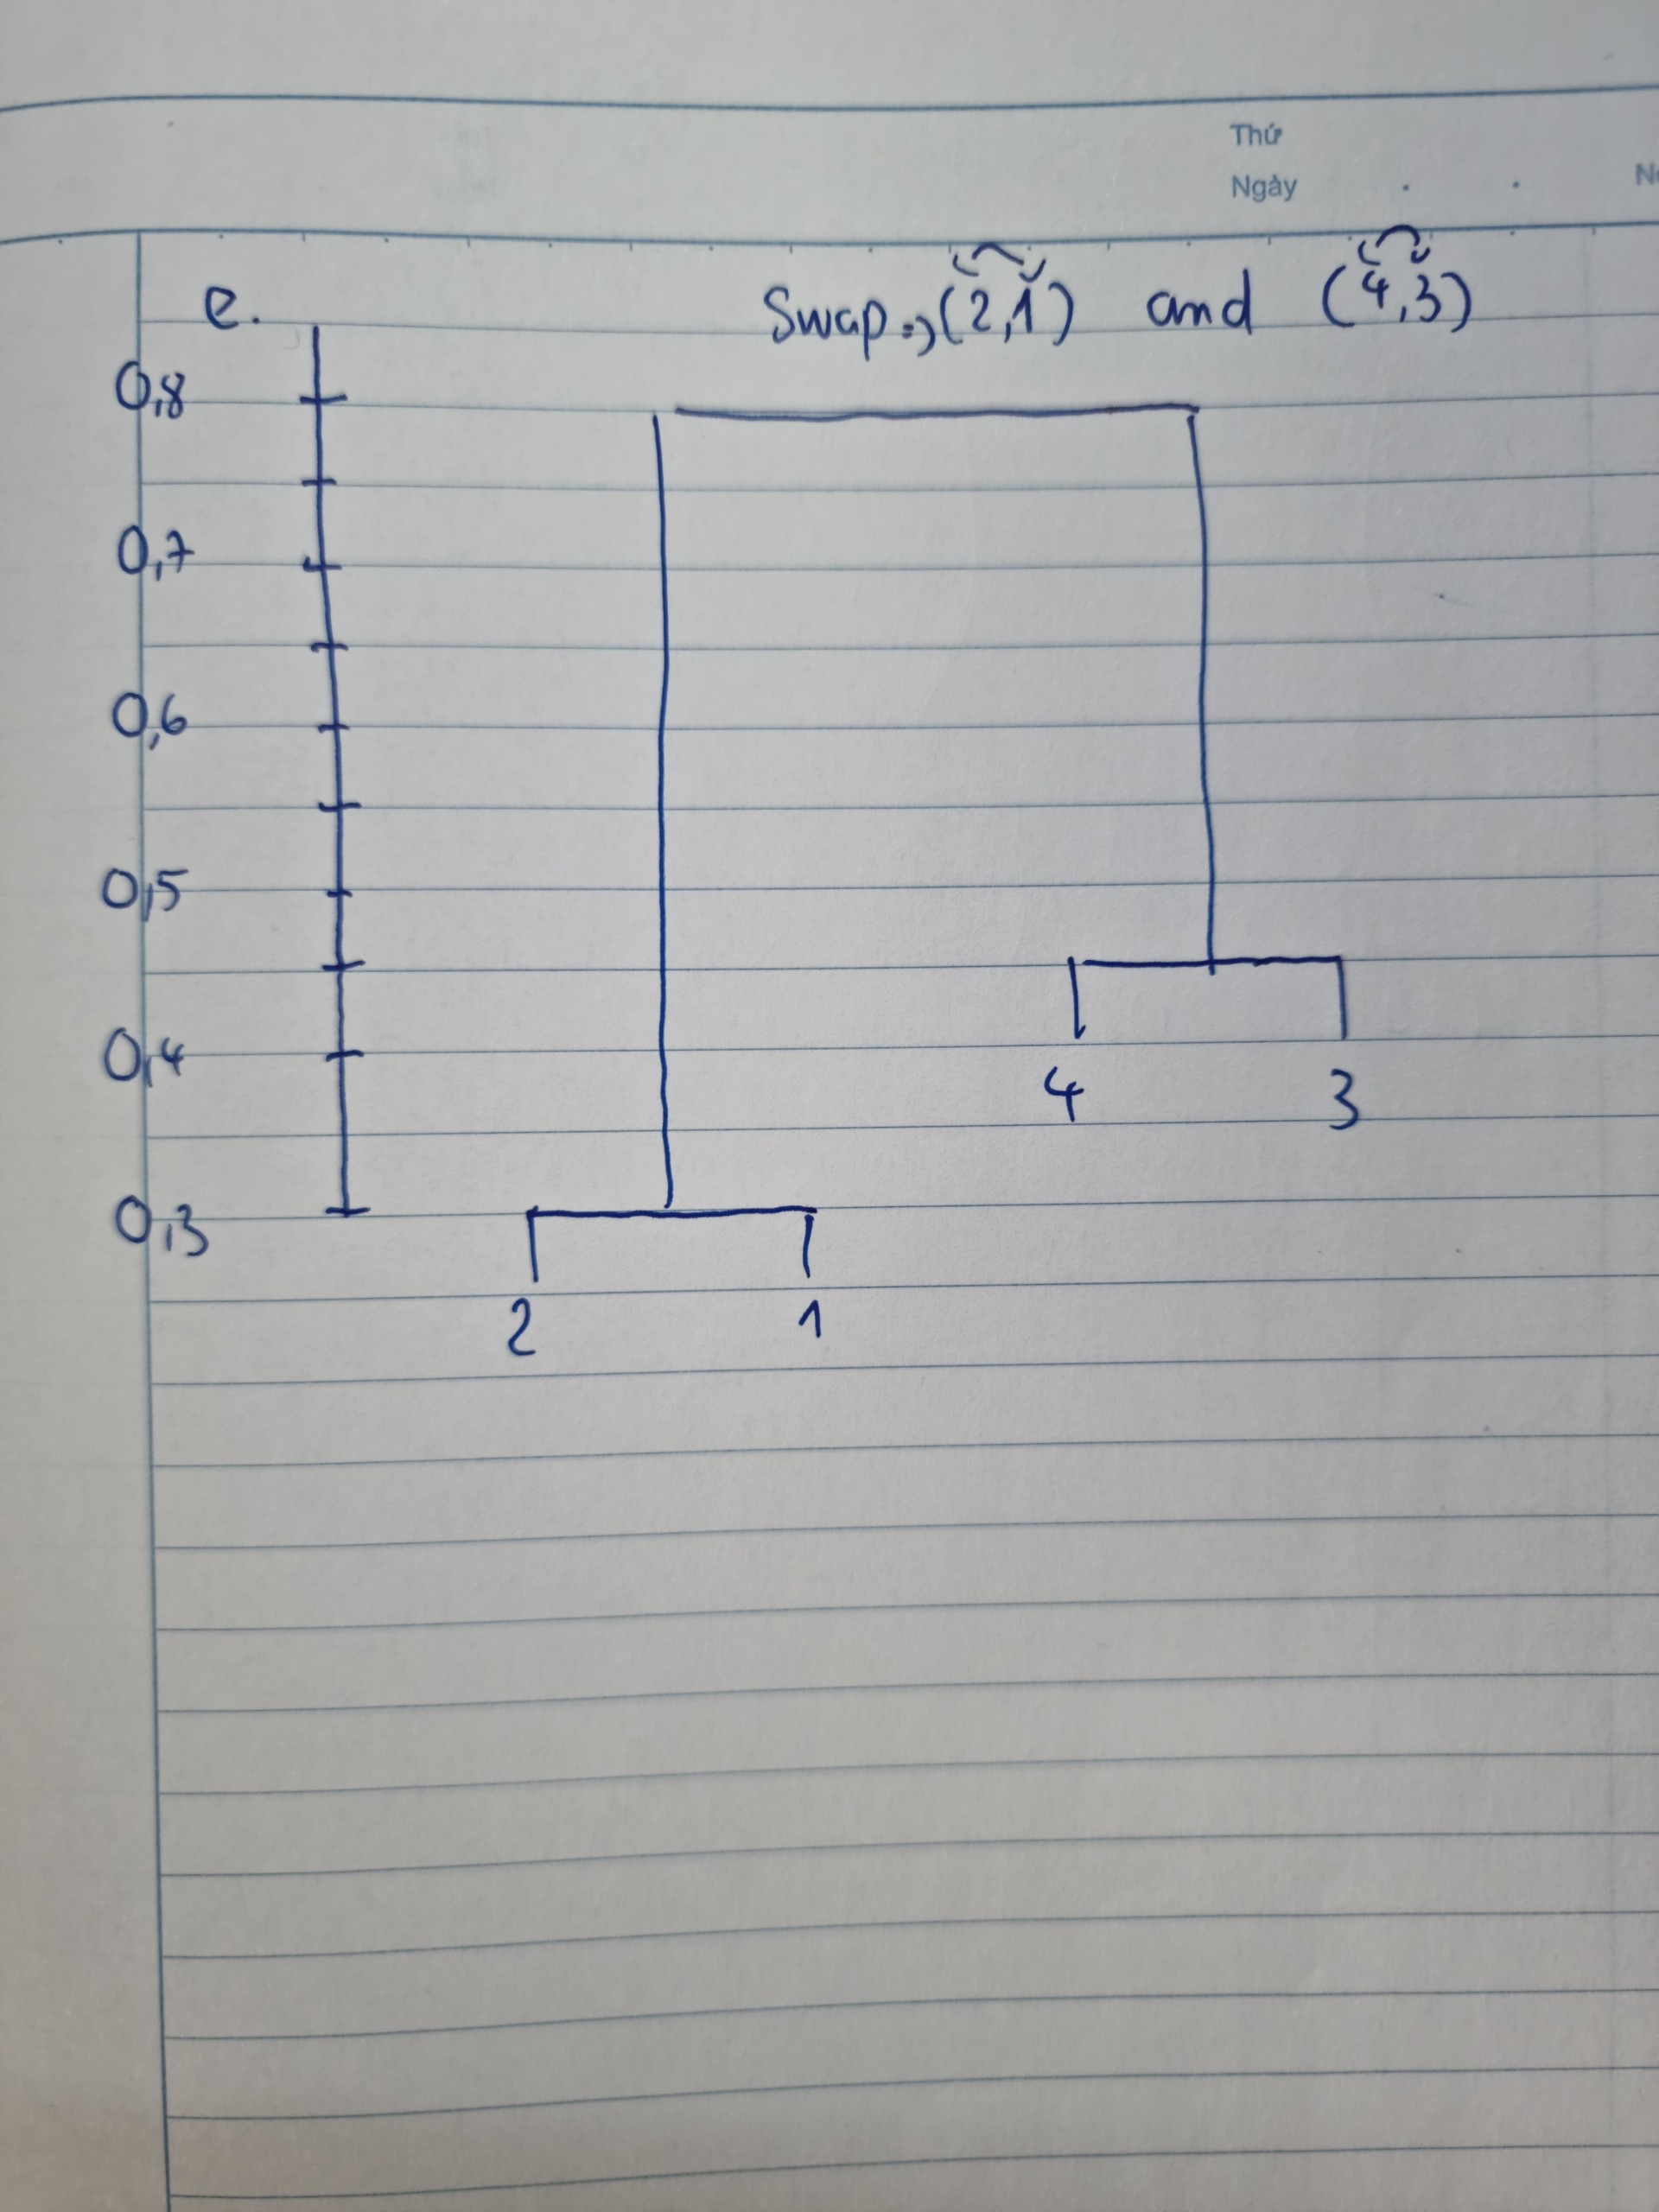